<a href="https://colab.research.google.com/github/debizson/Mesi/blob/main/ai_database_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Értelmezhetőség és magyarázhatóság a gépi tanulásban tárgy projektmunkájának
# 1. mérföldköve Dinnyés Balázs Emil GI Msc hallgató beadványa

# A választott adatbázis mintám moitivációm szerint egyszerű, könnyen
# értelmezhető ezért jól vizsgálható és kellően érdekes is számomra legalábbis.
# A jövőben gazdasági folyamatokkal szertnék foglalkozni, és ez a projekt
# érdekes tanulságokat jelent a jövő kutatásaimra nézve, mint gazdasági
# tényező az emberi döntések utján.

# The data is related with direct marketing campaigns (phone calls) of a
# Portuguese banking institution. The classification goal is to predict if the
# client will subscribe a term deposit (variable y).


# Additional Information

# The data is related with direct marketing campaigns of a Portuguese banking
# institution. The marketing campaigns were based on phone calls. Often, more
# than one contact to the same client was required, in order to access if the
# product (bank term deposit) would be ('yes') or not ('no') subscribed.


# behuzom a szükséges csomagokat
import numpy as np  # numeric calculations

import pandas as pd  # data manipulation and storage

# Popular visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt


%matplotlib inline

In [ ]:
# letöltöm a github - ról az adatbázisomat

bank_dataset = pd.read_csv("https://raw.githubusercontent.com/debizson/Mesi/2d071a09a92563b6b0f981c8fa37c1edf9550d43/bank.csv", sep=";")


#kiiratom az adatbázist

bank_dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
# Lássuk a tulajdonságokat!
bank_dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
 #  The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,
 #  in order to access if the product (bank term deposit) would be (or not) subscribed.

 #  The classification goal is to predict if the client will subscribe a term deposit (variable y).

 # 5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

 # 6. Number of Attributes: 16 + output attribute.

 # 7. Attribute information:

 #  For more information, read [Moro et al., 2011].

 # Input variables:
 # bank client data:
 # 1 - age (numeric)
 # 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
 #                                     "blue-collar","self-employed","retired","technician","services")
 # 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
 # 4 - education (categorical: "unknown","secondary","primary","tertiary")
 # 5 - default: has credit in default? (binary: "yes","no")
 # 6 - balance: average yearly balance, in euros (numeric)
 # 7 - housing: has housing loan? (binary: "yes","no")
 # 8 - loan: has personal loan? (binary: "yes","no")
 # related with the last contact of the current campaign:
 # 9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
 # 10 - day: last contact day of the month (numeric)
 # 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
 # 12 - duration: last contact duration, in seconds (numeric)
 # other attributes:
 # 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 # 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
 # 15 - previous: number of contacts performed before this campaign and for this client (numeric)
 # 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

 #  Output variable (desired target):
 # 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

 # 8. Missing Attribute Values: None

In [ ]:
# Most összébb szedem az oszlopokat egy típusba.
features_numeric = ['age', 'balance',
         'day', 'duration' , 'campaign', 'pdays',
       'previous']
features_boolean = ['default', 'housing',
       'loan']
features_categorical = ['job', 'marital', 'education', 'contact', 'month',
       'poutcome']
target = 'y'
# összefűzöm a tulajdonságokat most már tipussal sorrendbe
features = features_numeric + features_boolean + features_categorical + [target]

In [ ]:
features


['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'default',
 'housing',
 'loan',
 'job',
 'marital',
 'education',
 'contact',
 'month',
 'poutcome',
 'y']

In [ ]:
bank_dataset = bank_dataset[features]
bank_dataset

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,job,marital,education,contact,month,poutcome,y
0,30,1787,19,79,1,-1,0,no,no,no,unemployed,married,primary,cellular,oct,unknown,no
1,33,4789,11,220,1,339,4,no,yes,yes,services,married,secondary,cellular,may,failure,no
2,35,1350,16,185,1,330,1,no,yes,no,management,single,tertiary,cellular,apr,failure,no
3,30,1476,3,199,4,-1,0,no,yes,yes,management,married,tertiary,unknown,jun,unknown,no
4,59,0,5,226,1,-1,0,no,yes,no,blue-collar,married,secondary,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,no,yes,no,services,married,secondary,cellular,jul,unknown,no
4517,57,-3313,9,153,1,-1,0,yes,yes,yes,self-employed,married,tertiary,unknown,may,unknown,no
4518,57,295,19,151,11,-1,0,no,no,no,technician,married,secondary,cellular,aug,unknown,no
4519,28,1137,6,129,4,211,3,no,no,no,blue-collar,married,secondary,cellular,feb,other,no


In [ ]:
# Ahhoz, hogy a tulajdonságokat jól kezleje a collab, bizonyos átalakításokat kell tennem.

In [ ]:
import warnings

def enforce_dtypes(df: pd.DataFrame, cols: list, dtype):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        df[cols] = df[cols].astype(dtype)

In [ ]:
# előkészítés gyanánt előszőr a yes - eket és a no - kat 1 - re és 0 - ra
# változtatom, hogy aztán jól konvertáljam bool - ra.

for column in bank_dataset.columns:
    bank_dataset.loc[bank_dataset[column] == 'yes', column] = 1.0
    bank_dataset.loc[bank_dataset[column] == 'no', column] = 0.0
    # a megfelelő számokat logikai értékekre változtatom
    if column in features_boolean + [target]:
        bank_dataset.loc[bank_dataset[column].astype('float').astype('bool'), column] = True
        bank_dataset.loc[~bank_dataset[column].astype('float').astype('bool'), column] = False
# az alap szám formátum float lesz
enforce_dtypes(bank_dataset, features_numeric, float)
# a döntési oszlpok típusa pedig bool lesz
enforce_dtypes(bank_dataset, features_boolean + [target], bool)

bank_dataset

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,job,marital,education,contact,month,poutcome,y
0,30.0,1787.0,19.0,79.0,1.0,-1.0,0.0,False,False,False,unemployed,married,primary,cellular,oct,unknown,False
1,33.0,4789.0,11.0,220.0,1.0,339.0,4.0,False,True,True,services,married,secondary,cellular,may,failure,False
2,35.0,1350.0,16.0,185.0,1.0,330.0,1.0,False,True,False,management,single,tertiary,cellular,apr,failure,False
3,30.0,1476.0,3.0,199.0,4.0,-1.0,0.0,False,True,True,management,married,tertiary,unknown,jun,unknown,False
4,59.0,0.0,5.0,226.0,1.0,-1.0,0.0,False,True,False,blue-collar,married,secondary,unknown,may,unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,-333.0,30.0,329.0,5.0,-1.0,0.0,False,True,False,services,married,secondary,cellular,jul,unknown,False
4517,57.0,-3313.0,9.0,153.0,1.0,-1.0,0.0,True,True,True,self-employed,married,tertiary,unknown,may,unknown,False
4518,57.0,295.0,19.0,151.0,11.0,-1.0,0.0,False,False,False,technician,married,secondary,cellular,aug,unknown,False
4519,28.0,1137.0,6.0,129.0,4.0,211.0,3.0,False,False,False,blue-collar,married,secondary,cellular,feb,other,False


In [ ]:
# Most elvégzem a train - dev - test vágásokat a jovőre nézve, hogy hatéknyan
# tudjam a modellillesztést elvégezni tanítással, teszteléssel

# Ehhez kell a megfelelő segéd csomag
from sklearn.model_selection import train_test_split

# a vágás a következő arányban fog történni:  a 0.7(train):0.1(dev):0.2(test)
train, test = train_test_split(bank_dataset, train_size=0.8, random_state=0)
train, dev = train_test_split(train, train_size=int(len(bank_dataset)*0.7), random_state=0)
len(train), len(dev), len(test)

(3164, 452, 905)

In [ ]:
# Leellenorzőm, a vágásom pontosságát

len(train)/len(bank_dataset)

0.6998451669984517

In [ ]:
# Itt kiíratom a train halmazt
train

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,job,marital,education,contact,month,poutcome,y
2963,31.0,12569.0,9.0,344.0,1.0,295.0,1.0,False,False,False,management,single,tertiary,cellular,sep,failure,True
899,51.0,10287.0,29.0,117.0,1.0,-1.0,0.0,False,True,False,blue-collar,divorced,unknown,unknown,may,unknown,False
4027,45.0,265.0,28.0,14.0,3.0,-1.0,0.0,False,False,False,technician,married,tertiary,cellular,aug,unknown,False
276,35.0,11219.0,12.0,699.0,2.0,79.0,1.0,False,False,False,housemaid,married,tertiary,cellular,aug,failure,False
4103,46.0,25.0,26.0,103.0,2.0,-1.0,0.0,False,False,False,management,divorced,tertiary,unknown,may,unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,37.0,4039.0,25.0,106.0,2.0,-1.0,0.0,False,False,True,management,married,tertiary,cellular,jul,unknown,False
4332,27.0,8366.0,7.0,458.0,2.0,349.0,1.0,False,False,False,student,single,secondary,cellular,may,other,False
4217,38.0,2812.0,30.0,830.0,1.0,-1.0,0.0,False,True,False,unemployed,married,tertiary,cellular,apr,unknown,True
3879,25.0,1420.0,8.0,124.0,2.0,-1.0,0.0,False,False,False,admin.,single,tertiary,cellular,apr,unknown,False


In [ ]:
# Mivel nincsenek hiányzó értékeim, így nincs szükségem ennek kezelésére.

# MOST KÖVETKEZIK AZ ADATVIZUALIZÁCIÓ!

<Figure size 30000x30000 with 0 Axes>

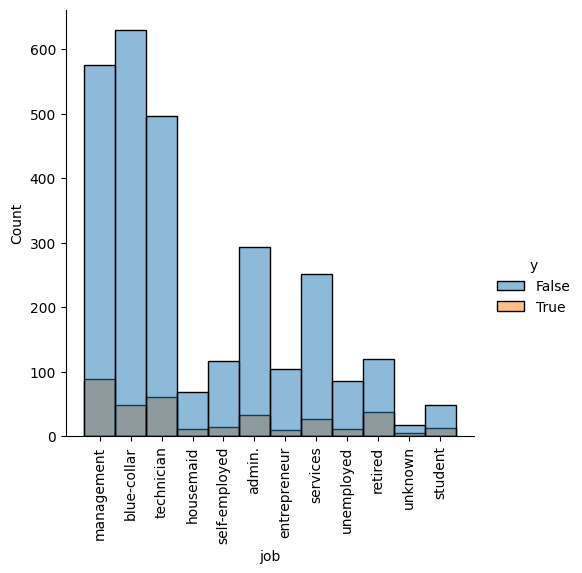

In [ ]:
# Az alábbi ábrán jól látható foglalkozások szerinti eloszlás a banki ajánlat
#  elfogadása tekintetében. Az ábra azt mutatja, hogy a különböző
#  munkát végző személyek milyen eséllyel fogadják el a kampányszerű banki
#  csomagot. A diagrammon az látható többek között, hogy például a nyugdíjasok
#  (retired) arányában többen állnak kötélnek a banki ajánlatnak, mint
#  a legtöbb más munkakörben tevékenykedők. Az is mellékesen látható az oszlopok
#  magasságából, hogy a megkeresések leginkább a menedzsment, technikai, és a
#  szakmunkások(blue - collar) körében népszerűbb. Ezért ott több a pozitív válasz.

plt.figure(figsize=(300, 300))  # Ábra méretének növelése
sns.displot(data=train, kind="hist", x="job", hue="y")
plt.xticks(rotation=90)
plt.show()

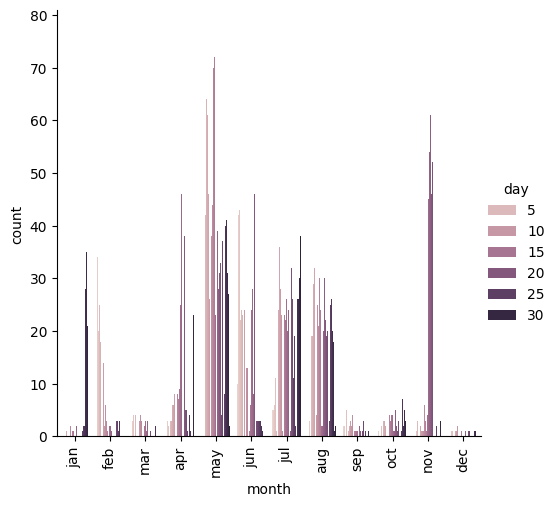

In [ ]:
plot = sns.catplot(data=train, kind="count", x="month", hue="day", order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plot.set_xticklabels(rotation=90)

# A munka a banknál leginkább a melegebb hónapokban jellemző, ami jól látható az
#  ábrán. Azon belül is május a legsűrűbb időszak. A téli hónapoknál egyedül
#  január vége február elejei kötődés és még novemberben van kiugrás.
#  A többi hidegebb időszakban nagy a pangás. Úgy látszik a rossz időjárás
#  a befektetni való kedvet is elveszi a kuncsaftoknál.

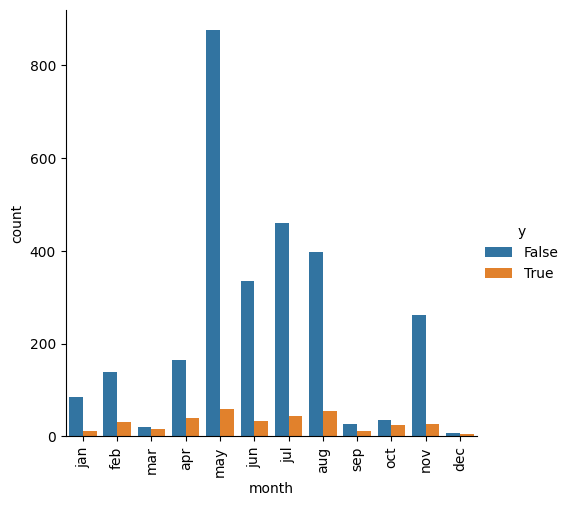

In [ ]:
plot = sns.catplot(data=train, kind="count", x="month", hue="y", order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plot.set_xticklabels(rotation=90)

# Most az előző diagram, változtatva a hónapok szerint, de a kisebb felbontás
#  egy hónapra a y címke változót mutatja. Azaz látható, hogy arányosan
#  a forgalomhoz képest a nyári hónapokban fogadnak ell több ajánlatot

<Axes: xlabel='marital', ylabel='age'>

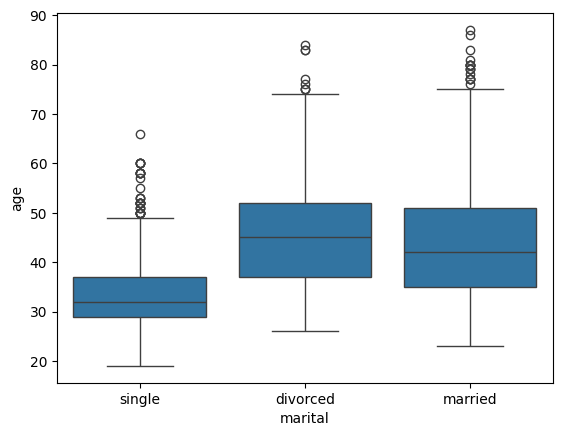

In [ ]:
sns.boxplot(x="marital", y="age", data=train)
# Itt már a családi állapot, azon belül a házassági állapotot veszem górcső alá.
# A megkeresések családi állapot és a kor eloszlásában medián és a
# kvartilisek terén.
# Az elváltak tekintetében a nagyobb aktivitásra a kicsit magasabb kor
# a jellemző, mint a szingli és házasok között.
# A szigli megkeresésekre a fiatalabb érdeklődés a jellemző.
# Minden csoportban láthatóan vannak outsider - ek,
# azaz durván kiugró példányok, amik kevésbé reprezentálják az ábra többi részét,
# azaz a boxplotot.

<ipython-input-118-e9f979e9847d>:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.catplot(data=train, kind="violin", scale="count", x="marital", y="age", hue="y", linewidth=0.4)


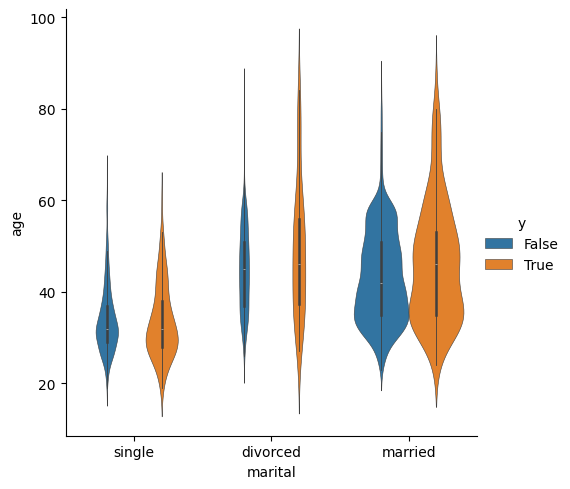

In [ ]:
# Most ugyanazt vizsgálom, mint fent, csak még mellé veszem a cél
#  faktort, ami boolean típusú, azaz elfgadta vagy nem az ajánlatot.
#  Látható, hogy a különféle helyzetekben házas, elvált, szingli jó formán
#  eléggé láthatóan ugyanaz a koroszály fogadja el és utasítja el hasonló
#  hányadban.

sns.catplot(data=train, kind="violin", scale="count", x="marital", y="age", hue="y", linewidth=0.4)



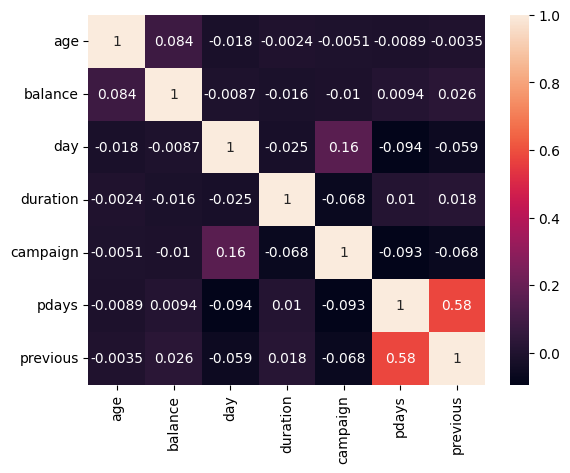

In [ ]:
# Most a numerikus feature - ok együttmozgásának mértékét, az úgynevezett
#  korrelációt vizsgálom. A pozítiv együtt mozgásra nézek teljesülést.
#  Különböző párok másképp viselkedhetnek és viselkednek is, aminek lehet érdekes
#  de lehet kézenfekvő oka. Az utóbbira példa a previous, a kampány előtti konataktok
#  száma és a pdays, a utolsó és a mostani kampány közötti eltelt napok számának
#  együttmozgása. Nyilvánvalóan minél több nap telt el, annál több lehetett a megelőző
#  kontakt.
#  Viszont érdekes az együttmozgás a campaign változó és a day között. Úgy látszik
#  bár gyengén, hogy minél több kontaktja volt a kliensnek a
#  jelenlegi ajánlatban, anál inkább az utolsó napon történik ez meg a hónapban.
#  Vagyis a komolyan érdeklődő ügyfelek valószínűleg a fizetés előtt látják
#  jobban az anyagi helyzetüket. Hogy mit engedhetnek meg magunknak végső soron.
#  Ezzel érdemes a banknak számolni!


corr = bank_dataset[features_numeric].corr()

sns.heatmap(corr,annot = True)


plt.show()



In [ ]:
# Most nézzük meg ugyanezt, ha a zavaró  -1 - eseket kiveszem a pdays
#  jellemzőből és azt a jobban érthető
#  0 - kkal helyettesítem.
for column in bank_dataset.columns:
    bank_dataset.loc[bank_dataset['pdays'] == -1.0, 'pdays'] = 0.0

bank_dataset


,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,job,marital,education,contact,month,poutcome,y
0,30.0,1787.0,19.0,79.0,1.0,0.0,0.0,False,False,False,unemployed,married,primary,cellular,oct,unknown,False
1,33.0,4789.0,11.0,220.0,1.0,339.0,4.0,False,True,True,services,married,secondary,cellular,may,failure,False
2,35.0,1350.0,16.0,185.0,1.0,330.0,1.0,False,True,False,management,single,tertiary,cellular,apr,failure,False
3,30.0,1476.0,3.0,199.0,4.0,0.0,0.0,False,True,True,management,married,tertiary,unknown,jun,unknown,False
4,59.0,0.0,5.0,226.0,1.0,0.0,0.0,False,True,False,blue-collar,married,secondary,unknown,may,unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,-333.0,30.0,329.0,5.0,0.0,0.0,False,True,False,services,married,secondary,cellular,jul,unknown,False
4517,57.0,-3313.0,9.0,153.0,1.0,0.0,0.0,True,True,True,self-employed,married,tertiary,unknown,may,unknown,False
4518,57.0,295.0,19.0,151.0,11.0,0.0,0.0,False,False,False,technician,married,secondary,cellular,aug,unknown,False
4519,28.0,1137.0,6.0,129.0,4.0,211.0,3.0,False,False,False,blue-collar,married,secondary,cellular,feb,other,False


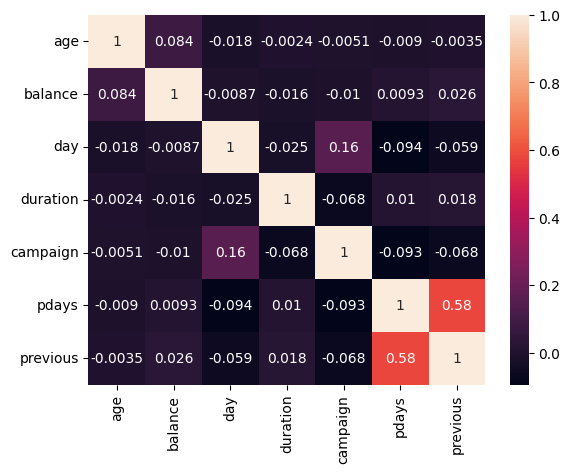

In [ ]:

corr = bank_dataset[features_numeric].corr()

sns.heatmap(corr,annot = True)


plt.show()

# Az látható, hogy jelentősen nem változtatja meg a korrelációkat a
#  pdays jellmezőnél a -1 -esek
#  kivétele és 0 - ra cserélése, hiszen a többi érték a többi jellemzőknél
#  sokkal nagyobb. Ez lehet az oka.

In [ ]:
# Itt látható a kapcsolat a day és a campaign között,
#  hogy a hónap melyik napján vannak a hívások
#  A hónap végefele enyhén növekszik az aktivitás,


alt.Chart(bank_dataset).mark_point().encode(
    x='day',
    y='campaign'
).interactive()

alt.Chart(...)

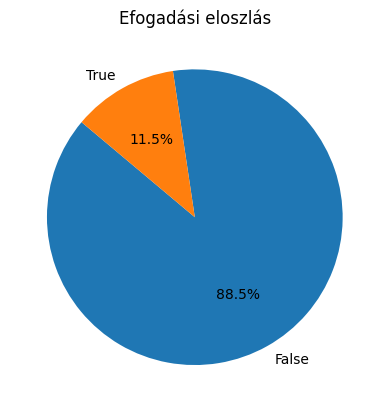

In [ ]:
# Az ügyfelek végleges reakciója, azaz az y címke eloszlása

eloszlas = bank_dataset['y'].value_counts()
plt.pie(eloszlas, labels=eloszlas.index, autopct='%1.1f%%', startangle=140)
plt.title('Efogadási eloszlás')

plt.show()

In [ ]:
# Címkék eloszlásának megtekintése
eloszlas = bank_dataset['y'].value_counts()

print(eloszlas)

y
False    4000
True      521
Name: count, dtype: int64


In [ ]:
# Itt az látszik, hogy az előző kampány óta, átlagosan 41 nap telt el egy
#  kliensnél úgy, hogy újra fel lett hívva. Tehát úgy,
#  hogy a -1 - esek ki vannak cserélve 0 - kra az adatbázisban.
#  Átlag kiszámítása:
atlag = bank_dataset['pdays'].mean()

print(f'Az érték(pdays) átlaga: {atlag}')

Az érték(pdays) átlaga: 40.58615350586153


In [ ]:
# Itt a csökkenő hozadék elve szerint azt mutatom, hogy
#  2.27 db hívást érdemes megtenni a cél érdekében, afelett már inkáb esélytelen
#  a próbálkozás, mert 2.9 hívás az átlaga a sikertelnnek.

atlagok = bank_dataset.groupby('y')['campaign'].mean().reset_index()

atlagok



,y,campaign
0,False,2.862250
1,True,2.266795


Text(0.5, 0, 'címke')

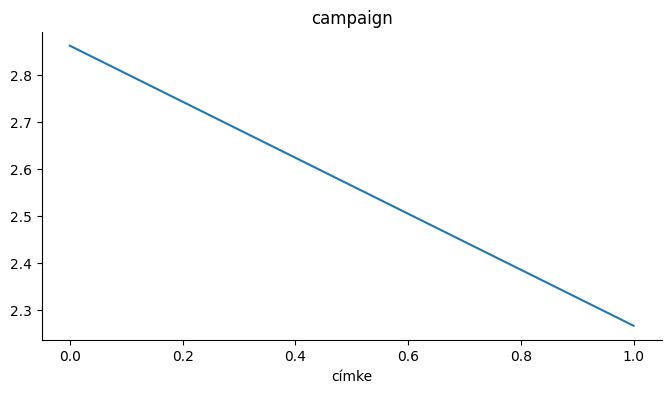

In [ ]:
# Látható, hogy inkább a 2.3 db hívás fele érdemes haladni a cél érdekében,
#  mint inkább a 2.8 fele.

from matplotlib import pyplot as plt
atlagok['campaign'].plot(kind='line', figsize=(8, 4), title='campaign')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('címke')


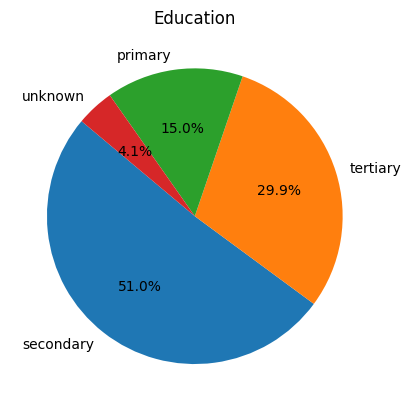

In [ ]:
# Az ügyfelek közti iskolázottsági eloszlások

eloszlas = bank_dataset['education'].value_counts()
plt.pie(eloszlas, labels=eloszlas.index, autopct='%1.1f%%', startangle=140)
plt.title('Education')

plt.show()